In [12]:
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns
import tweepy

In [11]:

api_key = "CdSdZMq5yZG2ti6fMFSv3gTNV"
api_token = "1uLW9WwtAYEu90je7oW3WKmsmGdh6tBYuNsV95HOeEvPHuekxB"
access_token = "857530568-ZzxNZ1SJzZgdxqotyWIefWU7zR2q3eVvHQRkBn80"
access_token_secret = "7hJLfPqOTlEF3XTuW7qSOxzzoXJn0DZFO6oqxTxD4ISBc"

In [13]:
auth = tweepy.OAuthHandler(api_key,api_token)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [35]:
tweets = api.search(q="Donald Trump",count=100)

In [36]:
tweets_data = []
sentiments = []
for tweet in tweets:
    tweet = tweet.text
    tweet = re.sub("RT","",tweet)
    tweet = re.sub("[@]+[a-zA-Z0-9._:]+","",tweet)
    tweet = re.sub('[h]+[t]+[t]+[p]+[a-zA-Z0-9._:/?]+',"",tweet)
    tweet = tweet.strip()
    tweets_data.append(tweet)
    tweet = TextBlob(tweet)
    if tweet.detect_language()!='en':
        tweet = tweet.translate(to='en')
    if tweet.sentiment.polarity>0.1:
        print("Posistive \n")
        sentiments.append("positive")
    elif tweet.sentiment.polarity<-0.1:
        print("Negative")
        sentiments.append("Negative")
    else:
        print("Neutral")
        sentiments.append("Neutral")
    print(tweet)

Posistive 

Donald Trump is the civic committee organizer of Trump's program, so why is the government spending! It is very surprising that the country…
Neutral
▪️Won’t read briefs over 2 pages

▪️Spent a week hiding at Chevening like it’s some stately home-sized fridge instead o…
Neutral
The petiton to Pardon Roger Stone is here:
Posistive 

There is simply no person better suited to run against the asinine proposition of a socialist America than President D…
Neutral
Biden, Warren, and Buttigieg all took their post-loss speech as a chance to take shots at Bernie Sanders.

For Bernie’s par…
Neutral
. says that in 2016, Obama admin. officials told her the "the worst-case scenario" would be that "Donald Trump would use…
Neutral
Ahmedabad Commissioner of Police, Ashish Bhatia on US President Donald Trump's visit: Defence Research and Development Organisatio…
Neutral
A strongman who insults Muslims in his nation will lecture  India on 'religious freedom' because there is no such thing…
Neu

Posistive 

Sanders wins Nevada and strengthens in the Democratic presidential race
Neutral
▪️Won’t read briefs over 2 pages

▪️Spent a week hiding at Chevening like it’s some stately home-sized fridge instead o…
Neutral
This is your daily reminder that Hillary Clinton and the DNC paid for Russian intelligence to take down Donald Trump

Th…
Neutral
Biden, Warren, and Buttigieg all took their post-loss speech as a chance to take shots at Bernie Sanders.

For Bernie’s par…
Posistive 

Gujarat: Security tightened at Sabarmati Ashram in Ahmedabad, where US President Donald Trump and the First Lady Melania Trump wil…
Posistive 

Tea Pain says it’s time for the Democrats to winnow the field.  If you’re not in the top 3, drop out and help the party sel…
Posistive 

When are the FBI going to open an investigation into the way the Democratic Party is brazenly supporting the election of Don…
Neutral
A strongman who insults Muslims in his nation will lecture  India on 'religious freedom' because 

TranslatorError: Must provide a string with at least 3 characters.

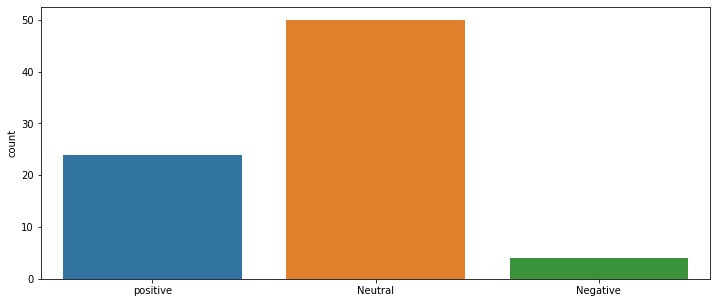

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(sentiments)
plt.show()

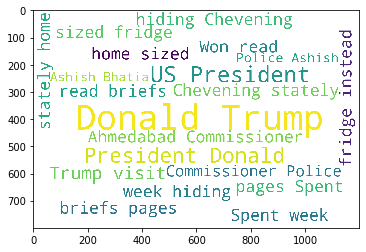

In [39]:
data = " ".join(tweets_data)
wd = wordcloud.WordCloud(width=1200,height=800,background_color="white",
                        max_words=20).generate_from_text(data)
plt.imshow(wd)
plt.show()